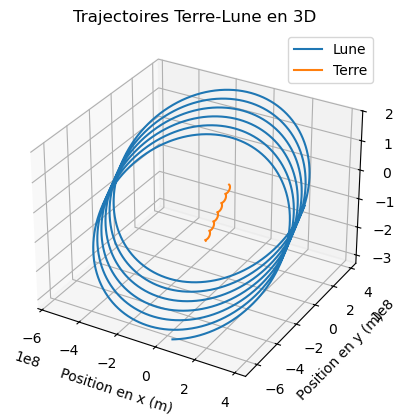

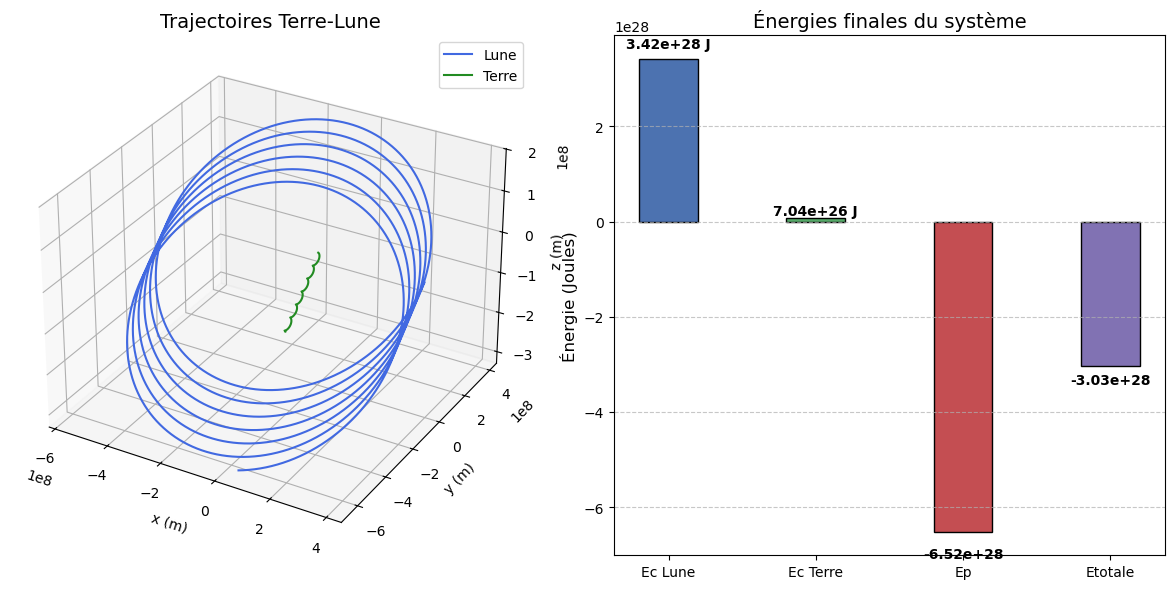

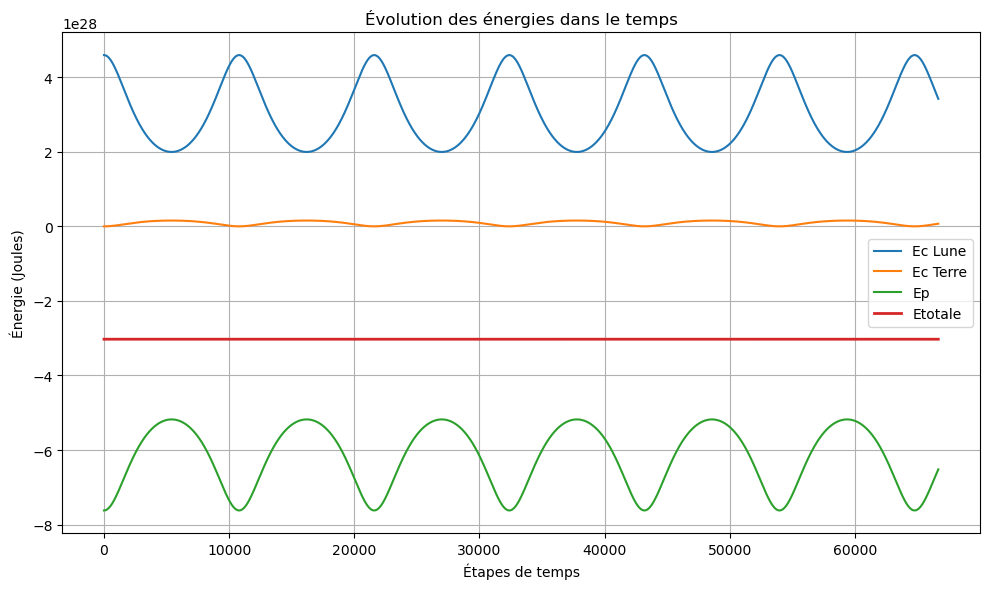

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


G = 6.67430e-11
MTerre = 5.97219e24
MLune = 7.3477e22
debug = False

positionT = [0,0,0]
'''xT = 0
yT = 0
zT = 0'''

positionL = [3.844e8, 0, 0]
'''xL = 3.844e8
yL = 0
zL = 0'''

vitesseT = [0,0,0]
'''vT_x = 0.0
vT_y = 0.0
vT_z = 0.0'''

vitesseL = [0,1000,500]
'''vL_x = 0.0
vL_y = 1000 #m.s^-1
vL_z = 500.0'''

# 1000 m.s^-1


# l'intervalle de temps au bout de laquelle on calcule la nouvelle position
dT = 300


Ec_list = []
energie_totale_list = []


# avancement du temps
t = 60

#------------------------------------------------------------------------------------------------------------------------------
def calcul_distance(x1, y1, z1, x2, y2, z2):
    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    d = math.sqrt(dx**2 + dy**2 + dz**2)
    return dx, dy, dz, d

def calcul_force_gravitationnelle(G, M1, M2, dx, dy, dz, d):

    G = 6.67430e-11
    F = G * M1 * M2 / d**2
    Fx = F * dx / d
    Fy = F * dy / d
    Fz = F * dz / d
    return Fx,Fy,Fz 

def calcul_acceleration(Fx, Fy, Fz, M):
    ax = Fx/M
    ay = Fy/M
    az = Fz/M
    return ax, ay, az

def mise_a_jour_vitesse(vx, vy, vz, ax, ay, az, dT):
    vx += ax*dT 
    vy += ay*dT
    vz += az*dT
    return vx, vy, vz

def mise_a_jour_position(x, y, z, vx, vy, vz, dT):
    x += -vx*dT
    y += -vy * dT
    z += -vz * dT

    return x, y,z


def Ec (m, vx, vy, vz):
    v = vx**2+vy**2+vz**2
    Ec = 0.5*m*v
    return Ec


def energie_potentielle(G, M1, M2, d):
    Epp = -G * M1 * M2 / d
    return Epp


# -------------------------------------------  représentation graphique  -------------------------------------------------------

# 1) stocker les infos : Le programme calcule les positions à chaque instant, mais si je ne les stockes pas quelque part,
# je ne pourras pas les tracer à la fin. Les listes vont conserver un historique des positions.

# position initial de la Lune = xL, yL
xL_list = [xL]
yL_list = [yL]
zL_list = [zL]
xT_list = [xT]
yT_list = [yT]
zT_list = [zT]

Ec_Lune_list = []
Ec_Terre_list = []
Ep_list = []
Etotale_list = []



Tmax = 20000000

while t < Tmax:

    # 1. Mise à jour des positions relatives
    #    et calcul de la distance entre les deux astres avec le théorème de Pythagore 3 dimensions
    dx, dy, dz, d = calcul_distance(xT, yT, zT, xL, yL, zL)
 
    # 2. Force gravitationnelle (norme)
    FxL, FyL, FzL = calcul_force_gravitationnelle(G, MTerre, MLune, dx, dy, dz, d)

    # 3. Décomposition de la force
    FxT = -FxL
    FyT = -FyL
    FzT = -FzL

    # 4. accélération Lune
    aL_x, aL_y, aL_z = calcul_acceleration(FxL, FyL, FzL, MLune)
    aT_x, aT_y, aT_z = calcul_acceleration(FxT, FyT, FzT, MTerre)


    # 5. Mise à jour des vitesses
    vL_x, vL_y, vL_z = mise_a_jour_vitesse(vL_x, vL_y, vL_z, aL_x, aL_y, aL_z, dT)
    vT_x, vT_y, vT_z = mise_a_jour_vitesse(vT_x, vT_y, vT_z, aT_x, aT_y, aT_z, dT)

    # 6. Mise à jour des positions

    xL, yL, zL = mise_a_jour_position(xL, yL, zL, vL_x, vL_y, vL_z, dT)
    xT, yT, zT = mise_a_jour_position(xT, yT, zT, vT_x, vT_y, vT_z, dT)



    # 7. Stockage des positions
    xL_list.append(xL)
    yL_list.append(yL)
    zL_list.append(zL)
    xT_list.append(xT)
    yT_list.append(yT)
    zT_list.append(zT)

    # print(xL_list)

    # 8. Temps
    t += dT

    # 9. Energie

    Ec_Lune = Ec(MLune, vL_x, vL_y, vL_z)
    Ec_Terre = Ec(MTerre, vT_x, vT_y, vT_z)
    Ep = energie_potentielle(G, MTerre, MLune, d)
    energie_totale = Ec_Lune + Ec_Terre + Ep
    energie_totale_list.append(energie_totale)


    Ec_Lune = Ec(MLune, vL_x, vL_y, vL_z)
    Ec_Terre = Ec(MTerre, vT_x, vT_y, vT_z)
    Ep = energie_potentielle(G, MTerre, MLune, d)
    Etot = Ec_Lune + Ec_Terre + Ep

    Ec_Lune_list.append(Ec_Lune)
    Ec_Terre_list.append(Ec_Terre)
    Ep_list.append(Ep)
    Etotale_list.append(Etot)


    



# Création d'une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xL_list, yL_list, zL_list, label="Lune")
ax.plot(xT_list, yT_list, zT_list, label="Terre")

ax.set_xlabel("Position en x (m)")
ax.set_ylabel("Position en y (m)")
ax.set_zlabel("Position en z (m)")
ax.set_title("Trajectoires Terre-Lune en 3D")
ax.legend()
plt.show()



# Affichage Energie


# Créer une figure avec 2 sous-graphes côte à côte
fig = plt.figure(figsize=(12, 6))

# --------- Sous-graphe 1 : Trajectoires 3D ---------
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(xL_list, yL_list, zL_list, label="Lune", color="royalblue")
ax1.plot(xT_list, yT_list, zT_list, label="Terre", color="forestgreen")

ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_zlabel("z (m)")
ax1.set_title("Trajectoires Terre-Lune", fontsize=14)
ax1.legend()

# --------- Sous-graphe 2 : Graphique en bâtons des énergies ---------

# Données finales
Ec_Lune = Ec(MLune, vL_x, vL_y, vL_z)
Ec_Terre = Ec(MTerre, vT_x, vT_y, vT_z)
Ep = energie_potentielle(G, MTerre, MLune, d)
Etot = Ec_Lune + Ec_Terre + Ep

noms = ['Ec Lune', 'Ec Terre', 'Ep', 'Etotale']
valeurs = [Ec_Lune, Ec_Terre, Ep, Etot]
couleurs = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']  # Palette douce

ax2 = fig.add_subplot(122)
barres = ax2.bar(noms, valeurs, width=0.4, color=couleurs, edgecolor='black')

# Afficher les valeurs numériques sur les barres
for i, bar in enumerate(barres):
    y = bar.get_height()
    offset = abs(y) * 0.05  # Décalage vertical (5% de la hauteur)

    # Si positif, placer le texte au-dessus ; si négatif, en dessous
    if y >= 0:
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            y + offset,
            f"{valeurs[i]:.2e} J",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )
    else:
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            y - offset,
            f"{valeurs[i]:.2e}",
            ha="center",
            va="top",
            fontsize=10,
            fontweight="bold"
        )


ax2.set_title("Énergies finales du système", fontsize=14)
ax2.set_ylabel("Énergie (Joules)", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Ec_Lune_list, label="Ec Lune")
plt.plot(Ec_Terre_list, label="Ec Terre")
plt.plot(Ep_list, label="Ep")
plt.plot(Etotale_list, label="Etotale", linewidth=2)

plt.xlabel("Étapes de temps")
plt.ylabel("Énergie (Joules)")
plt.title("Évolution des énergies dans le temps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


